In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the data
city_data = pd.read_csv(city_data_to_load)
city_data.head()
ride_data = pd.read_csv(ride_data_to_load)

In [2]:
# Combine the data into a single dataset
pyber_data = pd.merge(ride_data, city_data, how='left', on=['city', 'city'])
pyber_data.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789,33,Urban


# Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban_type = pyber_data[pyber_data['type'] == 'Urban']
suburban_type = pyber_data[pyber_data['type'] == 'Suburban']
rural_type = pyber_data[pyber_data['type'] == 'Rural']

In [4]:
#Number of drivers per city
urban_drivers = urban_type.groupby(['city']).mean()['driver_count']
suburban_drivers = suburban_type.groupby(['city']).mean()['driver_count']
rural_drivers = rural_type.groupby(['city']).mean()['driver_count']

In [5]:
#Number of rides per city
urban_rides = urban_type.groupby(['city']).count()['ride_id']
suburban_rides = suburban_type.groupby(['city']).count()['ride_id']
rural_rides = rural_type.groupby(['city']).count()['ride_id']

In [6]:
#Average fare per city
urban_fare = urban_type.groupby(['city']).mean()['fare']
suburban_fare = suburban_type.groupby(['city']).mean()['fare']
rural_fare = rural_type.groupby(['city']).mean()['fare']

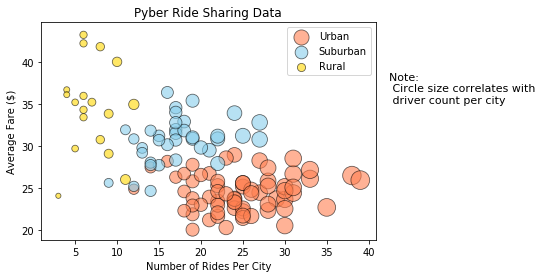

In [7]:
# Build the scatter plots for each city types
# (size of bubbles equals number of drivers per city)
plt.scatter(urban_rides, urban_fare, s=urban_rides*9, marker='o', color='Coral',
           edgecolor='black', linewidth=0.8, alpha=.6, label='Urban')
plt.scatter(suburban_rides, suburban_fare, s=suburban_rides*9, marker='o', color='SkyBlue',
           edgecolor='black', linewidth=0.8, alpha=.6, label='Suburban')
plt.scatter(rural_rides, rural_fare, s=rural_rides*9, marker='o', color='Gold',
           edgecolor='black', linewidth=0.8, alpha=.6, label='Rural')

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data')
plt.xlabel('Number of Rides Per City')
plt.ylabel('Average Fare ($)')

# Create a legend
plt.legend(loc='best')

# Incorporate a text label regarding circle size
text = 'Note: \n Circle size correlates with \n driver count per city'
plt.text(0.93, 0.6, text, fontsize=11, transform=plt.gcf().transFigure)

# Save Figure
plt.savefig('Pyber_bubble_chart', bbox_inches='tight')

In [8]:
#Total fares by city type
tot_urban_fare = urban_type.groupby(['type']).sum()['fare']
tot_suburban_fare = suburban_type.groupby(['type']).sum()['fare']
tot_rural_fare = rural_type.groupby(['type']).sum()['fare']

In [9]:
#Total all fares
tot_fares = pyber_data['fare'].sum()

In [10]:
#Percent of total fares by city type
percent_urban_fare = (tot_urban_fare / tot_fares * 100)
percent_suburban_fare = (tot_suburban_fare / tot_fares * 100)
percent_rural_fare = (tot_rural_fare / tot_fares * 100)

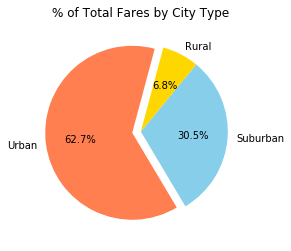

In [11]:
# Build Pie Chart
labels = ['Urban', 'Suburban', 'Rural']
sizes = [percent_urban_fare[0], percent_suburban_fare[0], percent_rural_fare[0]]
colors = ['Coral', 'SkyBlue', 'Gold']
explode = [0.1, 0.0, 0.0]
           
#Plot chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", startangle=75)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('Pyber_fare_chart')

# Total Rides by City Type

In [12]:
#Total rides by city type
tot_urban_rides = urban_type.groupby(['type']).count()['ride_id']
tot_suburban_rides = suburban_type.groupby(['type']).count()['ride_id']
tot_rural_rides = rural_type.groupby(['type']).count()['ride_id']

In [13]:
#Total all rides
tot_rides = pyber_data['ride_id'].count()

In [14]:
#Percent of total rides by city type
percent_urban_rides = (tot_urban_rides / tot_rides * 100)
percent_suburban_rides = (tot_suburban_rides / tot_rides * 100)
percent_rural_rides = (tot_rural_rides / tot_rides * 100)

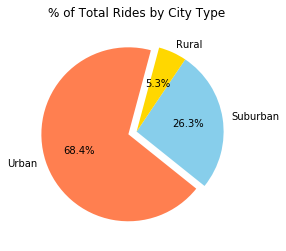

In [15]:
# Build Pie Chart
labels = ['Urban', 'Suburban', 'Rural']
sizes = [percent_urban_rides[0], percent_suburban_rides[0], percent_rural_rides[0]]
colors = ['Coral', 'SkyBlue', 'Gold']
explode = [0.1, 0.0, 0.0]

#Plot chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", startangle=75)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('Pyber_rides_chart')

# Total Drivers by City Type

In [16]:
# Number of drivers by city type
num_drivers = city_data.groupby(['type']).sum()['driver_count']
num_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [17]:
# Total number of drivers
tot_drivers = city_data['driver_count'].sum()
tot_drivers

2973

In [18]:
# Percent of drivers by type
driver_type_percent = num_drivers / tot_drivers * 100

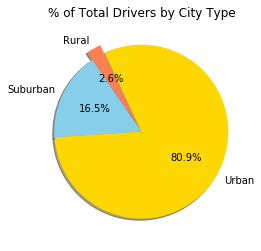

In [19]:
# Build pie charts
labels = ['Rural', 'Suburban', 'Urban']
colors = ['Coral', 'SkyBlue', 'Gold']
explode = [0.1, 0.0, 0.0]

# Plot chart
plt.pie(driver_type_percent, labels=labels, colors=colors, explode=explode, 
        autopct="%1.1f%%", startangle=115, shadow=True)
plt.title('% of Total Drivers by City Type')

# Save figure
plt.savefig('Pyber_driver_chart')